# The main task is find dependation between 2 features (average month temperature, month number) and monthly electricity usage.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
energy = pd.read_csv('elusage.csv', index_col = False)
energy.head(10)

,average_temperature,month,average_electricity_usage
0,73,8,24.828
1,67,9,24.688
2,57,10,19.310
3,43,11,59.706
4,26,12,99.667
5,41,1,49.333
6,38,2,59.375
7,46,3,55.172
8,54,4,55.517
9,60,5,25.938


### Getting informations about DataFrame (e.g. inproper/missing values and types of data used)

In [3]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   average_temperature        55 non-null     int64  
 1   month                      55 non-null     int64  
 2   average_electricity_usage  55 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.4 KB


#### **There are no missing values and all of them are numeric types**

### After DataFrame was made and check we need to give it as simple form as possible, so we will make column names shorter by removing useless `'average_'` substring (we know that every number in these 2 columns are the average values calculated from many observations taken during every month).

In [4]:
energy = energy.rename(columns={'average_temperature': 'temperature',
                                'average_electricity_usage': 'electricity_usage'})
energy.head()

,temperature,month,electricity_usage
0,73,8,24.828
1,67,9,24.688
2,57,10,19.310
3,43,11,59.706
4,26,12,99.667


---

## Global plot settings as a function

In [5]:
def global_plot_sets():
    plt.rc('xtick', color = 'k', labelsize = 18)
    plt.rc('ytick', color = 'k', labelsize = 18)
    plt.rc('axes', labelsize = 24, labelpad = 18, titlepad = 12,
           titlesize = 28, facecolor = '#CDCCC9', axisbelow = 'True')
    plt.rc('grid', color = 'w', linestyle = '-.', linewidth = 0.75)
    plt.rc('legend', facecolor = 'w', fontsize = 16)
    plt.rc('xtick.major', size = 8, width = 1)
    plt.rc('xtick.minor', size = 5, width = 1)
    plt.rc('ytick.major', size = 8, width = 1)
    plt.rc('ytick.minor', size = 5, width = 1)

## Graphical dependancy between measured data

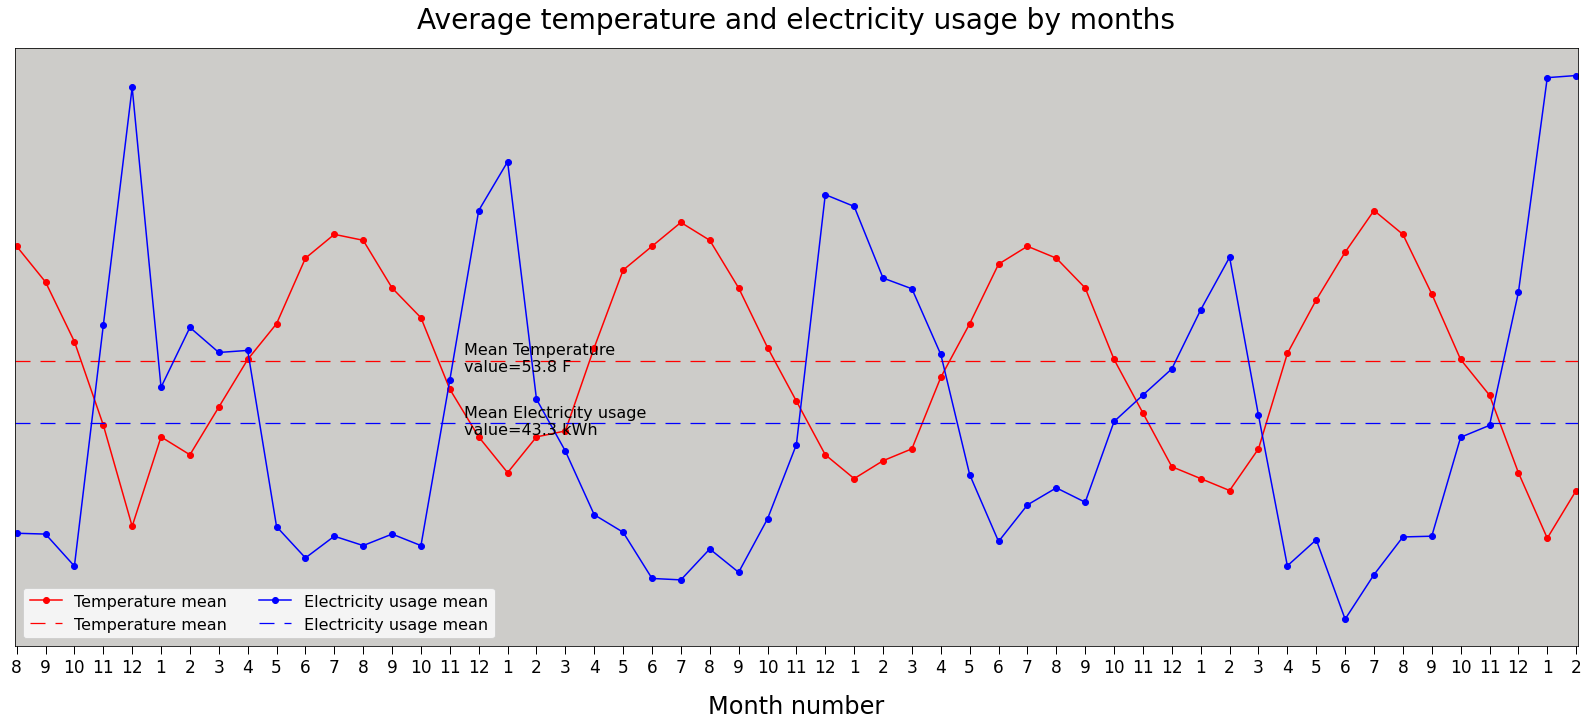

In [6]:
global_plot_sets()

plt.figure(figsize=(28, 11))

x_range = np.arange(1, energy.shape[0] + 1)
xticks_range = energy['month'].values
columns_list = ['temperature', 'electricity_usage']
colors_list = ['red', 'blue']
units_list = ['F', 'kWh']

for col_name, color, unit in zip(columns_list, colors_list, units_list):
    # Change column list into strings: 'Temperature', 'Electricity usage'
    label_name = ' '.join(str.capitalize(col_name).split('_'))
    mean = np.mean(energy[col_name])

    plt.plot(x_range, energy[col_name], c=color,
             marker='o', markersize=6, label=f"{label_name} mean")
    plt.axhline(y=mean, color=color,
                ls=(0, (12, 8)), lw=1.25, label=f"{label_name} mean")
    plt.text(0.3*len(energy), mean-1.8, f"Mean {label_name}\nvalue={str(round(mean, 1))} {unit}",
             fontdict={'fontsize': 16})

plt.xlabel('Month number')
## give some margin for line plots
plt.xlim(x_range.min() - 0.05, x_range.max() + 0.05)
plt.xticks(x_range, xticks_range, fontsize=17)
plt.yticks([]) ## Labels replaced by the legend
plt.grid([])   ## no grid makes plot easier to read
plt.title('Average temperature and electricity usage by months', pad=20)
plt.legend(ncol=2)  ## legend descriptions is too high

plt.show()

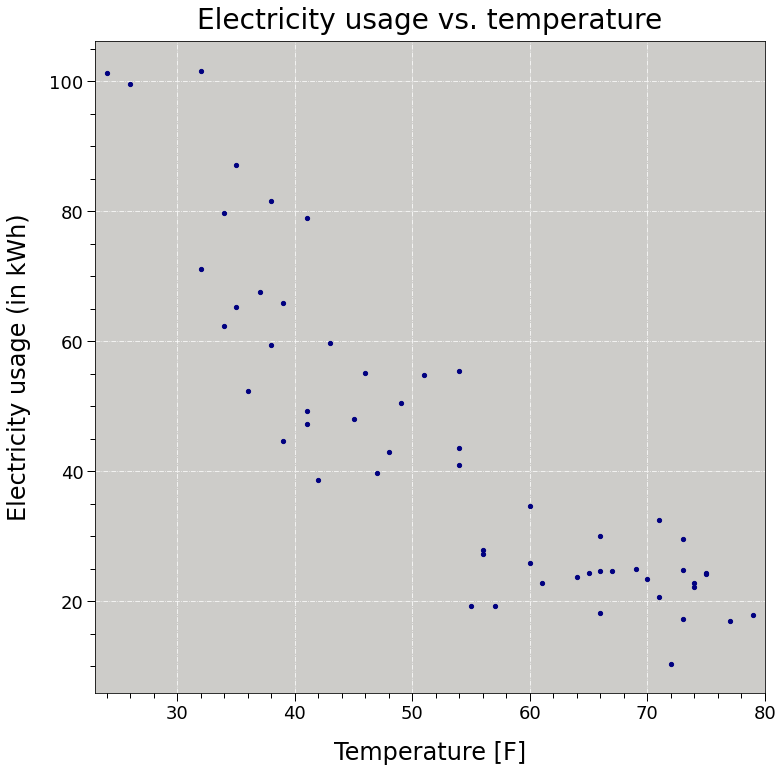

In [7]:
global_plot_sets()
plt.figure(figsize=(12, 12))

plt.scatter(energy['temperature'], energy['electricity_usage'], c = 'navy', marker = 'o', s = 18)
plt.xlabel('Temperature [F]')
plt.ylabel('Electricity usage (in kWh)')
plt.xlim(energy['temperature'].min() - 1, energy['temperature'].max() + 1)
plt.minorticks_on()
plt.grid()
plt.title('Electricity usage vs. temperature')

plt.show()

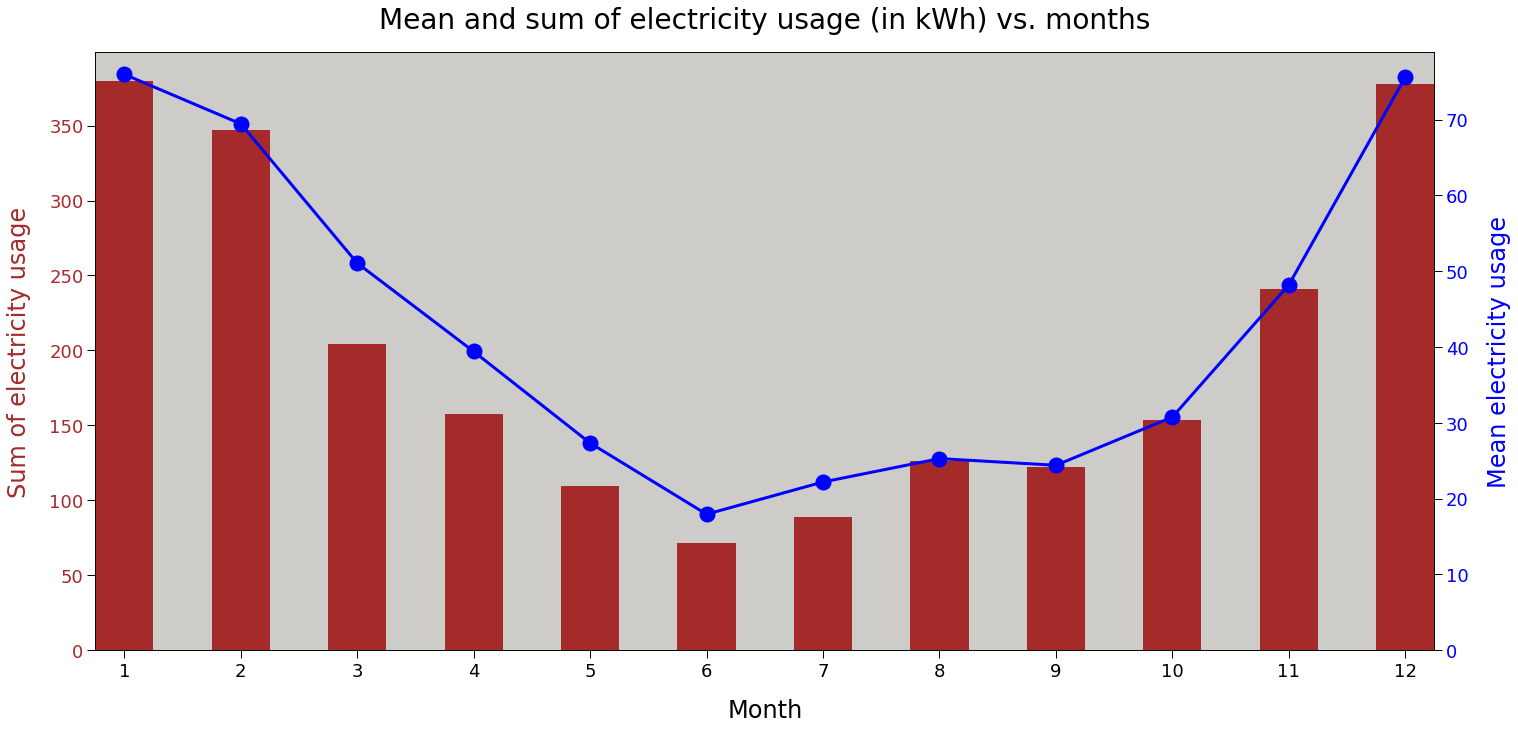

In [8]:
fig, ax1 = plt.subplots(figsize=(24, 11))
ax2 = ax1.twinx()

# Mean and sum values for every month of the year
months_mean_energy_used = energy.groupby('month')['electricity_usage'].mean()
months_sum_energy_used = energy.groupby('month')['electricity_usage'].sum()

month_number = months_sum_energy_used.keys()
w = 0.5   # bar width

ax1.bar(month_number, months_sum_energy_used, width = w, color = 'brown', linewidth=0)
ax2.plot(month_number, months_mean_energy_used, color = 'blue', linewidth=3, marker='o', markersize=15)
ax1.set_xlabel('Month')
ax1.set_ylabel('Sum of electricity usage', color='brown')
ax1.set_xlim((min(month_number)-0.5*w, max(month_number)+0.5*w))
ax1.tick_params(axis='y', labelcolor='brown')
ax1.set_xticks(month_number)    
ax2.set_ylabel('Mean electricity usage', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(ymin=0)
plt.title('Mean and sum of electricity usage (in kWh) vs. months', y=1.02)

plt.show()

---

# **Statistics for data set**

### Looking for **Pearson** and **Spearman** correlations

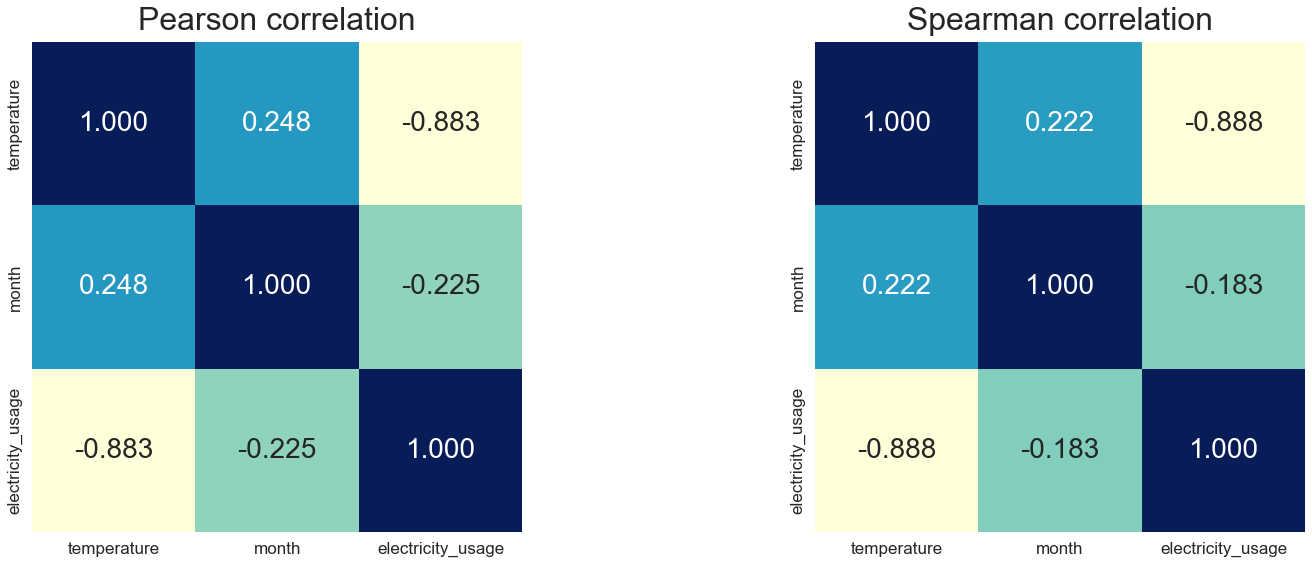

In [9]:
sns.set()

# Draw a heatmap with the numeric values in each cell
fig = plt.figure(figsize=(24, 8))

ax_ = [fig.add_subplot(1, 2, pos) for pos in [1,2]]
correlation_data = [energy.corr(method = option) for option in ['pearson', 'spearman']]
titles_array = ['Pearson correlation', 'Spearman correlation']

# We use axs parameter to tell seaborn which subplot to use for this plot
for axs, data, titles in zip(ax_, correlation_data, titles_array):
    sns.heatmap(data = data, square = True, cmap = "YlGnBu", cbar=False,
                fmt = '.3f', annot = True, annot_kws = {"fontsize": 28}, ax = axs)
    axs.set_xticklabels(ax_[0].get_xticklabels(), fontsize = 17)
    axs.set_yticklabels(ax_[0].get_xticklabels(), fontsize = 17)
    axs.set_title(titles, fontsize = 32)
    
plt.tight_layout()
plt.show()

## **Conclusions:** 
#### - `'month'` vs. `'electricity usage'` do not have enough strong linear and non-linear correlations, although plot show their cyclical (seasonal) dependancy,
#### - `'temperature'` and `'electricity_usage'` have got strong ***Spearman correlation***.

## Compare basic stats for `'temperature'` and `'electricity_usage'` data

<Figure size 432x288 with 0 Axes>

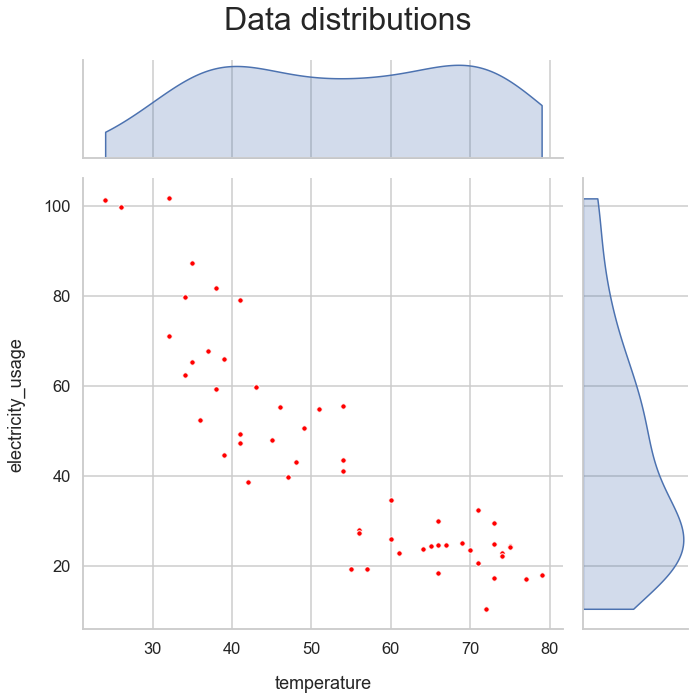

In [10]:
sns.set_style('whitegrid')
sns.set_context("talk")
plt.figure()

g = sns.JointGrid(data=energy, x='temperature', y='electricity_usage', height=10, ratio=4)
g.plot_joint(sns.scatterplot, alpha=1, color="red", linewidth=1, s=30)
g.plot_marginals(sns.kdeplot, shade=True, cut=0)
sns.despine()
g.fig.suptitle('Data distributions', fontsize=32)
g.fig.subplots_adjust(top=0.88) # Reduce plot to make room
g.fig.tight_layout()

plt.show()

### Data from `'temperature'` column is close to normal distribution, but `'electricity_usage'` is right-skewed (the largest number of observations are on the left side of histogram) - all `'electricity_usage'` observations will be transform by using a few the most common function:
- BoxCox (*normalization*),
- RobustScaler,
- QuantileTransformer,
- minmax_scale.

In [11]:
from scipy.stats import boxcox
from sklearn.preprocessing import minmax_scale, RobustScaler, QuantileTransformer

def data_transformations(data_name):
    # Results to compare
    original_data = data_name.values
    # reshape data to make .fit_transform() operations
    data_reshape = np.array(original_data).reshape(-1,1)
    
    func_1 = boxcox(original_data)[0]
    func_2 = RobustScaler(quantile_range=(25, 75)).fit_transform(data_reshape)[:,0]
    func_3 = QuantileTransformer(output_distribution='normal', 
                                 n_quantiles=len(data_name)).fit_transform(data_reshape)[:,0]
    func_4 = minmax_scale(original_data)
    
    # Create and return Dataframe with all data
    functions_list = np.array([original_data, func_1, func_2, func_3, func_4]).T
    function_titles = ['Original data', 'Normalized data', 'RobustScaler data',
                       'PowerTransformer data', 'MinMax_scale data']
    return pd.DataFrame(functions_list, columns=function_titles)    

df_transformed_data = data_transformations(energy['electricity_usage'])

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Compare original data with data transformed by statistical method(functions)

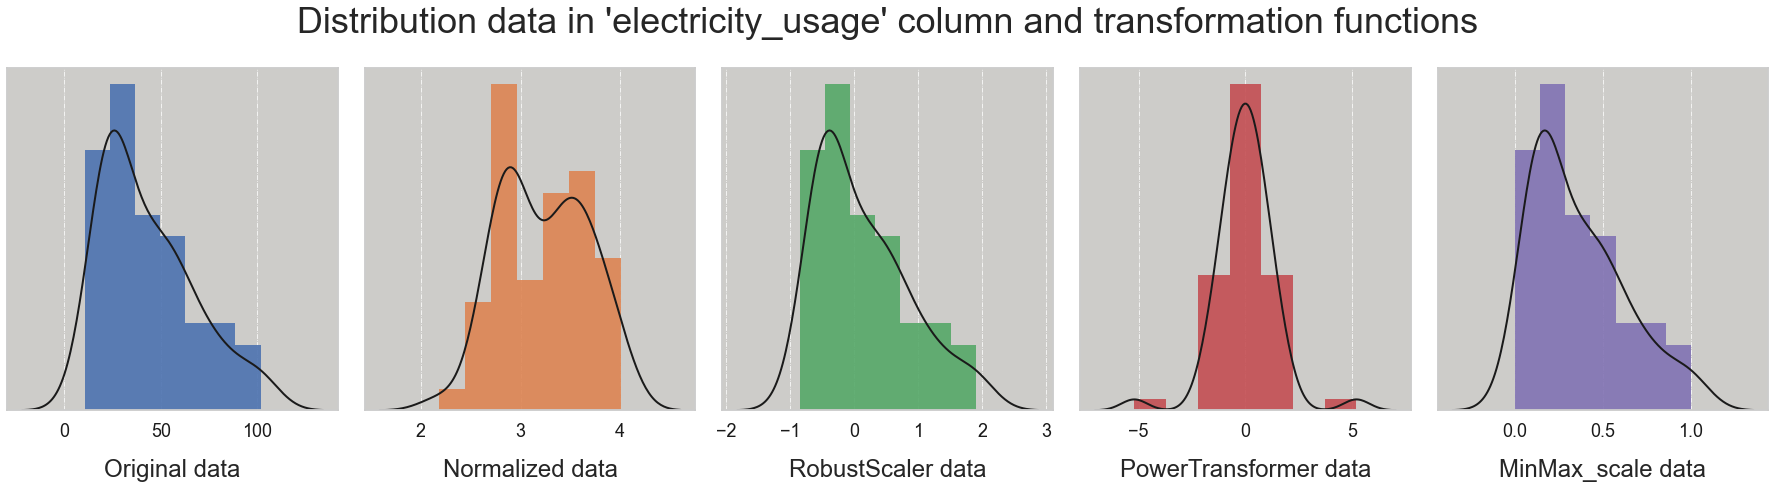

In [12]:
global_plot_sets()
fig, ax = plt.subplots(1, 5, figsize=(25, 7), sharey=False)

## Optimal number of bins
bin_num = int(np.sqrt(energy.shape[0]))

for i in range(0, df_transformed_data.shape[1]):
    sns.histplot(data=df_transformed_data, x=df_transformed_data.columns[i], color=sns.color_palette('deep')[i],
                 edgecolor="none", alpha=0.9, bins=bin_num, ax=ax[i], stat='density')
    sns.kdeplot(data=df_transformed_data, x=df_transformed_data.columns[i], color='k',
                linewidth=2, alpha=1, ax=ax[i])
    ax[i].set_ylabel(None)
    ax[i].set_yticks([])

plt.suptitle("Distribution data in 'electricity_usage' column and transformation functions", fontsize = 36, y=0.98)
plt.tight_layout()
#plt.show()

---

# Linear regression methods

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

### Calculate change in number of features

In [14]:
num_features = []
num_degr = [i for i in range(1, 11)]
for num in num_degr:
	# create transform
	poly_transf = PolynomialFeatures(degree=num)
	# fit and transform
	data = poly_transf.fit_transform(energy.iloc[:, :-1])
	# Notice number of features
	num_features.append(data.shape[1])
	# Conclusion
	print(f'For degree={num}, features number={data.shape[1]}')

For degree=1, features number=3
For degree=2, features number=6
For degree=3, features number=10
For degree=4, features number=15
For degree=5, features number=21
For degree=6, features number=28
For degree=7, features number=36
For degree=8, features number=45
For degree=9, features number=55
For degree=10, features number=66


### Features number grows quickly, so we will focus on polynomial degrees between 1-4.

In [15]:
## Library made for faster calculating data in Intel-based CPU (especially Xeon family)

from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Polynomial function will have degrees between 1. and 4. - higher degree values could be a reason of overfitting the final model.
#### **Polynomial regression** (1. to 4. degrees)

In [32]:
def poly_regression(func_data, func_name, n):
    ## Preparing Dataframe for regressing analyse
    _ = pd.DataFrame(data={'temperature': energy['temperature'], 'y': func_data})
    X, y = energy.iloc[:, :-1], func_data

    # models using the pipeline
    model = Pipeline(steps=[('preprocess', PolynomialFeatures(degree=n)), 
                            ('model', LinearRegression(n_jobs=10))])

    ## Predict values for every degree number
    model.fit(X, y)
    y_pred = model.fit(X,y).predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred, multioutput = 'variance_weighted')

    ## Insert R2_score and y_pred values from all polynomial degrees into different Dataframe columns
    _['y pred'] = y_pred
    _['R2'] = r2
    _['RMSE'] = rmse
    _['poly degree'] = n
    _['function name'] = func_name

    return _


def regression_results_concat(i):
    col_data, col_name = df_transformed_data.iloc[:, i], df_transformed_data.columns[i]
    df_name = [poly_regression(col_data, col_name, degree) for degree in np.arange(1, 5)]
    return pd.concat(df_name).reset_index(drop=True)

In [33]:
all_poly_results_original = pd.concat([regression_results_concat(i) for i in range(0, df_transformed_data.shape[1])], axis=0).reset_index(drop=True)

all_poly_results_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    1100 non-null   int64  
 1   y              1100 non-null   float64
 2   y pred         1100 non-null   float64
 3   R2             1100 non-null   float64
 4   RMSE           1100 non-null   float64
 5   poly degree    1100 non-null   int32  
 6   function name  1100 non-null   object 
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 56.0+ KB


In [46]:
R2_max_index = np.argmax(all_poly_results_original['R2'])
all_poly_results_original.loc[R2_max_index, :]

temperature                     73
y                        -0.415752
y pred                   -0.434481
R2                        0.864605
RMSE                      0.263857
poly degree                      4
function name    RobustScaler data
Name: 605, dtype: object